Imports

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv('RELIANCE.csv')

Preprocessing

In [3]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [4]:
data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,RELIANCE,EQ,1904.35,1920.00,1962.0,1911.50,1938.00,1937.85,1941.32,9620785,1.867699e+15,259137.0,4276703.0,0.4445
5302,2021-04-27,RELIANCE,EQ,1937.85,1940.00,1997.2,1938.25,1990.00,1988.65,1978.64,9226547,1.825602e+15,291197.0,3772144.0,0.4088
5303,2021-04-28,RELIANCE,EQ,1988.65,1997.85,2008.0,1980.15,1993.15,1997.30,1997.60,7902002,1.578508e+15,247331.0,3921560.0,0.4963
5304,2021-04-29,RELIANCE,EQ,1997.30,2022.90,2044.5,2007.30,2020.00,2024.05,2024.21,8035915,1.626634e+15,213153.0,2834103.0,0.3527
5305,2021-04-30,RELIANCE,EQ,2024.05,2008.50,2036.0,1987.55,1995.90,1994.50,2010.20,9150974,1.839532e+15,288687.0,3902504.0,0.4265


In [5]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2.456000e+03,4.792000e+03,4792.000000
mean,1010.984866,1012.602375,1026.823803,996.886977,1011.157143,1011.316839,1011.937409,5.583028e+06,6.076715e+14,1.452306e+05,2.280885e+06,0.435039
std,570.987079,572.575893,581.986757,560.703328,570.938608,571.046753,571.222520,4.983793e+06,8.369739e+14,1.297557e+05,1.882665e+06,0.144722
min,203.200000,205.500000,219.500000,197.150000,203.300000,203.200000,212.290000,5.282000e+04,4.295543e+12,2.991000e+03,2.909700e+04,0.076300
25%,572.137500,572.925000,582.950000,564.237500,572.062500,572.512500,573.190000,2.836454e+06,2.203354e+14,7.215900e+04,1.194524e+06,0.323325
50%,937.950000,939.000000,950.075000,927.550000,939.025000,938.275000,939.785000,4.213432e+06,3.662999e+14,1.021435e+05,1.810434e+06,0.449450
75%,1247.387500,1247.675000,1267.350000,1227.450000,1248.287500,1248.275000,1247.375000,6.602604e+06,6.656490e+14,1.686702e+05,2.752935e+06,0.544300
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.473434e+16,1.428490e+06,3.495888e+07,0.978300


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [7]:
data.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

 Ensure that the date column is in the appropriate format (e.g., datetime) for time series 
analysis.

In [8]:
data['Date'] = pd.to_datetime(data['Date'],errors='coerce',utc=False)

In [9]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [10]:
data=data.dropna()

In [11]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2850,2011-06-01,RELIANCE,EQ,951.85,952.00,958.65,943.65,947.5,946.80,947.83,1838452,1.742538e+14,58630.0,901415.0,0.4903
2851,2011-06-02,RELIANCE,EQ,946.80,936.55,954.70,936.55,952.5,951.05,947.09,2152963,2.039039e+14,63061.0,1066759.0,0.4955
2852,2011-06-03,RELIANCE,EQ,951.05,960.50,967.00,931.50,936.0,934.60,951.69,4368279,4.157238e+14,128784.0,1035791.0,0.2371
2853,2011-06-06,RELIANCE,EQ,934.60,934.65,940.80,928.15,938.6,937.75,935.29,1405741,1.314771e+14,43384.0,476631.0,0.3391
2854,2011-06-07,RELIANCE,EQ,937.75,933.55,960.00,933.55,959.6,958.25,950.55,4025919,3.826839e+14,88703.0,2424958.0,0.6023


In [12]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

 Plot line charts or time series plots to visualize the historical stock price trends over 
time

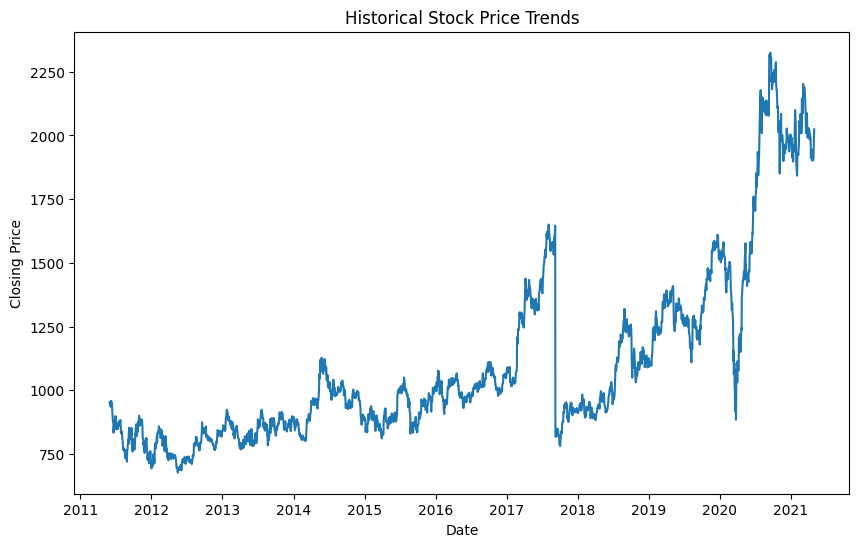

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Prev Close'])
plt.title('Historical Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

 Calculate and plot moving averages or rolling averages to identify the underlying
trends and smooth out noise.

In [14]:
data['MA_30'] = data['Prev Close'].rolling(window=30).mean()
data['MA_90'] = data['Prev Close'].rolling(window=90).mean()

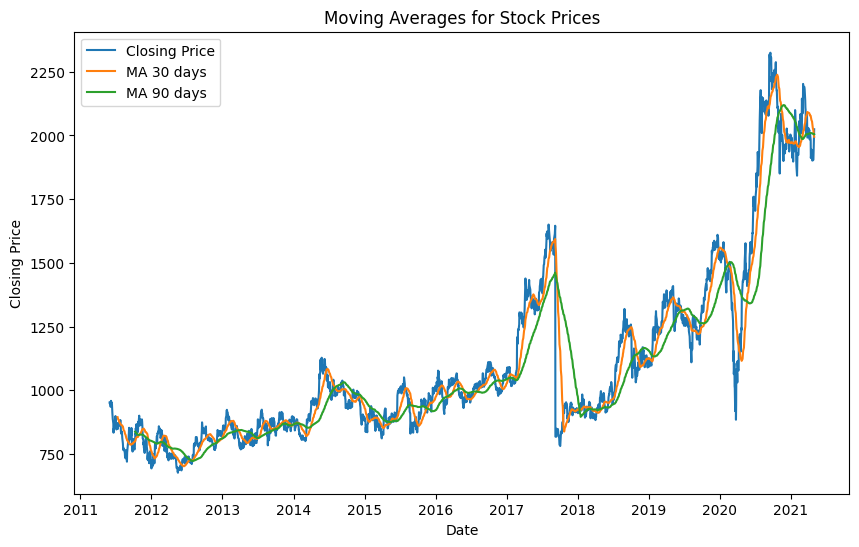

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Prev Close'], label='Closing Price')
plt.plot(data['Date'], data['MA_30'], label='MA 30 days')
plt.plot(data['Date'], data['MA_90'], label='MA 90 days')
plt.title('Moving Averages for Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

 Perform seasonality analysis to identify periodic patterns in the stock prices, such as 
weekly, monthly, or yearly fluctuations

In [17]:
data['Month'] = data['Date'].dt.strftime('%Y-%m')
monthly_average = data.groupby('Month')['Prev Close'].mean()

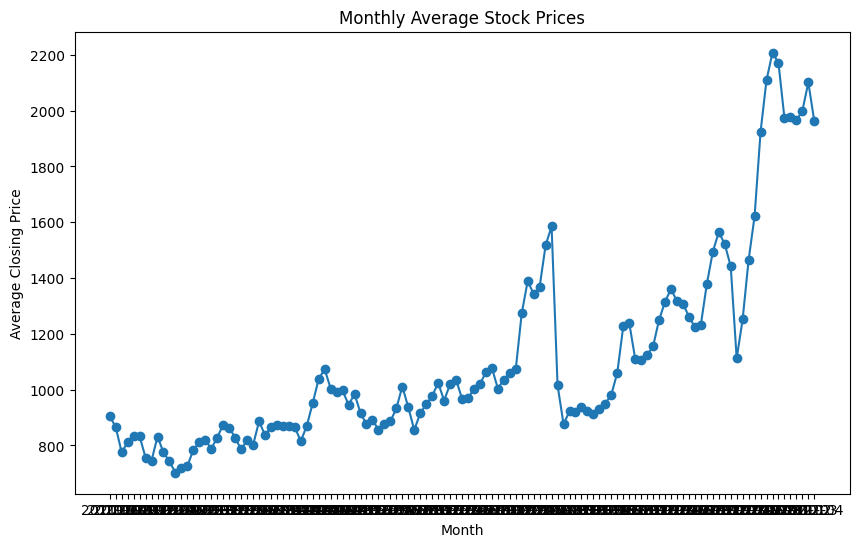

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_average.index, monthly_average.values, marker='o')
plt.title('Monthly Average Stock Prices')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.show()

 Analyze and plot the correlation between the stock prices and other variables, such as 
trading volume or market indices.


In [20]:
correlation = data['Prev Close'].corr(data['Volume'])
print(f"Correlation between Closing Price and Volume: {correlation}")

Correlation between Closing Price and Volume: 0.545682692742471


 Use autoregressive integrated moving average (ARIMA) models or exponential 
smoothing models to forecast future stock prices

In [23]:
model = ARIMA(data['Prev Close'], order=(5,1,0))
model_fit = model.fit()

C:\Users\Prathamesh Patil\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Prathamesh Patil\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Prathamesh Patil\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
forecast = model_fit.forecast(steps=10)

print("Forecasted stock prices:", forecast)

Forecasted stock prices: 2456    2021.862350
2457    2020.040153
2458    2019.951686
2459    2018.977372
2460    2019.468654
2461    2019.517755
2462    2019.511750
2463    2019.543816
2464    2019.508811
2465    2019.513586
Name: predicted_mean, dtype: float64


C:\Users\Prathamesh Patil\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Prathamesh Patil\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
